# Exercise 2: Josephson Junction Switching Readout: Thermal vs Quantum Escape (S-Curves)

## Purpose
This notebook models **switching readout** of a current-biased Josephson junction (JJ). The JJ’s phase behaves like a particle in a **tilted washboard potential**. For bias currents \\(I<I_c\\), the phase is trapped in a local minimum (zero DC voltage). It can **escape** the well and produce a finite voltage by either:
- **Thermal activation** over the barrier (Kramers process), or
- **Macroscopic Quantum Tunneling (MQT)** through the barrier at very low temperature.

By applying a square current pulse of duration \\(t_p\\) and plotting the **switching probability** \\(P_\text{switch}(I)\\), we obtain an **S-curve**. Its position and sharpness diagnose whether escape is dominated by thermal activation or quantum tunneling.

---

## Physical Picture (Tilted Washboard)
For a tunnel JJ with critical current \\(I_c\\), the potential energy for the phase \\(\varphi\\) under a DC bias \\(I\\) is
\\[
U(\varphi) = -E_J\cos\varphi - \frac{\Phi_0}{2\pi}I\,\varphi,\qquad
E_J=\frac{\Phi_0 I_c}{2\pi},\ \ \Phi_0=\frac{h}{2e}.
\\]
- At **subcritical bias** \\(I<I_c\\), \\(U(\varphi)\\) has local minima separated by barriers.
- Escape from a minimum (over or through the barrier) makes the phase “run,” giving a **finite average voltage** via \\(V=\frac{\hbar}{2e}\dot\varphi\\).

---

## Model & Parameters
- **Critical current** \\(I_c\\) and **capacitance** \\(C\\) define the small-oscillation (plasma) scale.
- **Temperature** \\(T\\) controls thermal activation.
- We use standard **underdamped** (low dissipation) approximations for escape **prefactors**.

**Key derived quantities**
- **Plasma frequency** at reduced bias \\(i\equiv I/I_c\\):
  \\[
  \boxed{\ \omega_p(i) = \sqrt{\frac{2e I_c}{\hbar C}}\;\bigl(1-i^2\bigr)^{1/4}\ }.
  \\]
- **Barrier height** of the tilted washboard:
  \\[
  \boxed{\ \Delta U(i) = 2E_J\!\left[\sqrt{1-i^2}-i\,\arccos(i)\right]\ }.
  \\]

---

## Escape Rates
- **Thermal activation (Kramers, underdamped prefactor):**
  \\[
  \boxed{\ \Gamma_\text{th}(i,T)\;\approx\;\frac{\omega_p(i)}{2\pi}\;
  \exp\!\left[-\frac{\Delta U(i)}{k_B T}\right]\ }.
  \\]
- **Macroscopic Quantum Tunneling (MQT, underdamped cubic-potential result):**
  \\[
  \boxed{\ \Gamma_\text{MQT}(i)\;\approx\;\frac{\omega_p(i)}{2\pi}\;
  \sqrt{\frac{864\,\Delta U(i)}{\hbar\,\omega_p(i)}}\;
  \exp\!\left[-\frac{36\,\Delta U(i)}{5\,\hbar\,\omega_p(i)}\right]\ }.
  \\]

**Crossover temperature (rule of thumb):**
\\[
T^\ast(i)\;\sim\;\frac{\hbar\,\omega_p(i)}{2\pi k_B}.
\\]
For \\(T\gg T^\ast\\), thermal activation dominates; for \\(T\ll T^\ast\\), MQT dominates.

---

## Switching Probability for a Pulse
For a square pulse of length \(t_p\),
\\[
\boxed{\ P_\text{switch}(i) \;=\; 1 - \exp\!\big[-\Gamma(i)\,t_p\big]\ },
\\]
where \\(\Gamma=\Gamma_\text{th}\\) at finite \\(T\\) and \\(\Gamma=\Gamma_\text{MQT}\\) at \\(T\approx 0\\).

---

## What the Code Does
1. Defines constants \\(h,\hbar,e,\Phi_0,k_B\\) and device parameters \\(I_c,C\\).
2. Computes \\(E_J=\Phi_0 I_c/(2\pi)\\).
3. Implements:
   - \\(\omega_p(i)\\), \\(\Delta U(i)\\),
   - \\(\Gamma_\text{th}(i,T)\\), \\(\Gamma_\text{MQT}(i)\\),
   - \\(P_\text{switch}(i,t_p,T)\\).
4. Sweeps bias \\(i=I/I_c\\) near 1 and evaluates \\(P_\text{switch}\\) for:
   - **MQT** (taking \\(T=None\\), i.e., \\(T\approx0\\)),
   - **Thermal** at \\(T=20\\) mK and \\(T=200\\) mK.
5. Plots three **S-curves** on the same axes and prints an estimate of \\(T^\ast\\) at mid-bias.

---

## How to Interpret the Plot
- **Higher temperature** shifts the S-curve **left** (switches at lower \\(I/I_c\\)) and **broadens** it due to larger \\(\Gamma_\text{th}\\).
- **MQT curve** (very low \\(T\\)) is **sharper** and sits closer to \\(I/I_c\to 1\\).
- By fitting experimental S-curves vs \\(T\\) and \\(t_p\\), you can extract:
  - \\(I_c\\) and \\(C\\) (through \\(\omega_p\\)),
  - The dominant escape mechanism,
  - Clues about **dissipation** (if you extend the model to include damping-dependent prefactors).

---

## Assumptions & Limitations
- **Underdamped** limit used for prefactors; real devices may need a quality factor \\(Q\\) and environment modeling (RCSJ with \\(R\\)).
- Ignores **extrinsic current noise** and device inhomogeneity that broaden switching distributions.
- The formulas are for **tunnel JJs**; other weak links (SNS, constrictions) can alter the current–phase relation and escape dynamics.

---

## Practical Notes
- Typical transmon-like junctions: \\(I_c\sim 10\text{–}500\ \mathrm{nA}\), \(C\sim 0.5\text{–}5\ \mathrm{pF}\\).
- **Pulse length \\(t_p\\)**: increasing \\(t_p\\) raises \\(P_\text{switch}\\) at a fixed bias because \\(P=1-e^{-\Gamma t_p}\\).
- To study **flux-tunable** junctions (SQUIDs), replace \\(I_c\to I_c(\Phi)\\) or \\(E_J\to E_J(\Phi)\\) and repeat the sweep vs external flux.

---

## Glossary
- \\(I_c\\): critical current (max zero-voltage supercurrent).
- \\(C\\): junction capacitance (sets inertia of the phase particle).
- \\(E_J\\): Josephson energy \\(=\Phi_0 I_c/2\pi\\).
- \\(\omega_p\\): plasma frequency (small oscillations in a potential well).
- \\(\Delta U\\): barrier height between adjacent minima.
- \\(\Gamma_\text{th}\\), \\(\Gamma_\text{MQT}\\): thermal and quantum escape rates.
- \\(P_\text{switch}\\): probability to switch to the voltage state during the pulse.
- \\(T^\ast\\): approximate thermal–quantum crossover temperature.

---


Estimated crossover temperature at i≈0.849: T* ≈ 48.7 mK


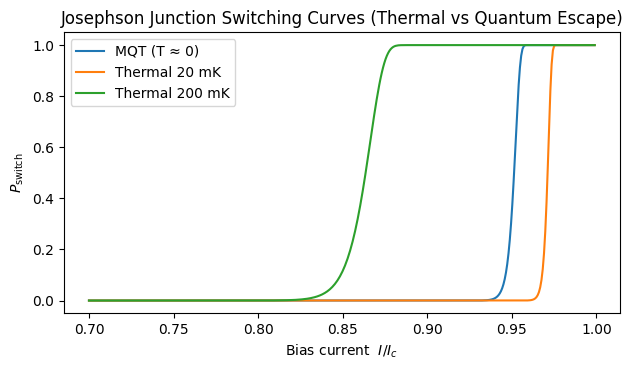

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Physical constants (SI units)
# -----------------------------
h    = 6.62607015e-34          # Planck constant [J·s]
hbar = 1.054571817e-34         # Reduced Planck constant [J·s]
e    = 1.602176634e-19         # Elementary charge [C]
phi0 = h / (2*e)               # Flux quantum Φ0 = h/2e [Wb]
kb   = 1.380649e-23            # Boltzmann constant [J/K]

# -----------------------------
# Device parameters (tunable)
# -----------------------------
Ic = 1.0e-6    # Critical current [A] (example: 1 µA)
C  = 1.0e-12   # Junction capacitance [F] (example: 1 pF)

# Josephson energy EJ = Φ0 Ic / (2π) [J]
EJ = phi0 * Ic / (2*np.pi)

# -------------------------------------------
# Helper: JJ plasma frequency and barrier ΔU
# -------------------------------------------
def omega_p(i):
    """
    JJ plasma angular frequency ω_p(i) [rad/s] at reduced bias i = I/Ic.
    Formula (underdamped, tunnel junction):
        ω_p(i) = sqrt(2 e Ic / (ħ C)) * (1 - i^2)^(1/4)
    We clip i to avoid singularities at |i| -> 1.
    """
    i = np.clip(i, 0.0, 0.999999)
    return np.sqrt(2*e*Ic/(hbar*C)) * (1 - i**2)**0.25

def delta_U(i):
    """
    Washboard barrier height ΔU(i) [J] for a current-biased JJ:
        ΔU(i) = 2 EJ [ sqrt(1 - i^2) - i arccos(i) ],   with i = I/Ic in [0,1).
    This is the exact tunnel-junction result (Likharev).
    """
    i = np.clip(i, 0.0, 0.999999)
    return 2*EJ * (np.sqrt(1 - i**2) - i*np.arccos(i))

# -------------------------------------------
# Escape rates: thermal activation vs. MQT
# -------------------------------------------
def gamma_th(i, T):
    """
    Thermal activation (Kramers) escape rate Γ_th [1/s]:
        Γ_th ≈ (ω_p / 2π) * exp( -ΔU / (k_B T) )
    Prefactor here is the undamped attempt frequency; damping can modify it.
    """
    return (omega_p(i)/(2*np.pi)) * np.exp(-delta_U(i)/(kb*T))

def gamma_mqt(i):
    """
    Macroscopic quantum tunneling (MQT) rate Γ_MQT [1/s] in the underdamped limit:
        Γ_MQT ≈ (ω_p / 2π) * sqrt( 864 ΔU / (ħ ω_p) ) * exp[ -36 ΔU / (5 ħ ω_p) ]
    This is the cubic-potential WKB result (Caldeira-Leggett/Grabert et al. form).
    """
    op  = omega_p(i)
    dU  = delta_U(i)
    pref = (op/(2*np.pi)) * np.sqrt(864.0 * dU / (hbar * op))
    expo = np.exp(-36.0 * dU / (5.0 * hbar * op))
    return pref * expo

# -------------------------------------------
# Switching probability for a square pulse
# -------------------------------------------
def P_switch(i, pulse_s, T=None):
    """
    Switching probability for a pulse of length 'pulse_s' [s] at reduced bias i.
      - If T is None: use the quantum (MQT) escape rate.
      - Else: use the thermal activation rate at temperature T [K].
    P = 1 - exp( -Γ(i) * t_p )
    """
    gamma = gamma_mqt(i) if (T is None) else gamma_th(i, T)
    return 1.0 - np.exp(-gamma * pulse_s)

# -----------------------------
# Sweep and plot S-curves
# -----------------------------
I   = np.linspace(0.7*Ic, 0.999*Ic, 400)  # bias current sweep near Ic
i_r = I / Ic                               # reduced bias i = I/Ic
t_p = 10e-6                                # pulse length [s], e.g., 10 µs

# Compute switching probabilities
Pq        = P_switch(i_r, t_p, T=None)     # Quantum tunneling (T ≈ 0)
Pt_20mK   = P_switch(i_r, t_p, T=0.020)    # Thermal at 20 mK
Pt_200mK  = P_switch(i_r, t_p, T=0.200)    # Thermal at 200 mK

# Optional: report an estimate of the crossover temperature at mid-bias
# T_star ≈ ħ ω_p / (2π k_B). This depends on i; we pick the middle of the sweep.
i_mid   = 0.5*(i_r[0] + i_r[-1])
T_star  = (hbar * omega_p(i_mid)) / (2*np.pi * kb)

print(f"Estimated crossover temperature at i≈{i_mid:.3f}: T* ≈ {T_star*1e3:.1f} mK")

# Plot
plt.figure(figsize=(6.4, 3.8))
plt.plot(i_r, Pq,        label='MQT (T ≈ 0)')
plt.plot(i_r, Pt_20mK,   label='Thermal 20 mK')
plt.plot(i_r, Pt_200mK,  label='Thermal 200 mK')
plt.xlabel('Bias current  $I/I_c$')
plt.ylabel('$P_\\mathrm{switch}$')
plt.title('Josephson Junction Switching Curves (Thermal vs Quantum Escape)')
plt.legend()
plt.tight_layout()
plt.show()
